# # Data Cleaning

# Importing Packages

In [101]:
#Importing the required library both for dataframe representation and Machine Learning
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

from collections import Counter
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import svm
from sklearn.model_selection import train_test_split


In [102]:
pwd

'C:\\Users\\Namrata\\Downloads'

In [103]:
#Reading the data and displaying first 5 index value details
twitter = pd.read_csv('information.csv', encoding = 'latin-1')
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/05/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/01/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [104]:
twitter.shape

(20050, 26)

In [105]:
#Counting the genders in the gender column
twitter['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [106]:
#Removing all rows which don't have gender as 'male' or 'female' 

twitter = twitter.loc[twitter['gender'].isin(['female', 'male'])]
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/05/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/01/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,06/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN


In [107]:
# describes the shape of dataset in no. of rows and columns
twitter.shape

(12894, 26)

In [108]:
# displays the no. of columns
twitter.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [109]:
#Dropping irrelevant columns from dataset

twitter = twitter.drop([ '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord',  'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [110]:
twitter.head()

,_unit_id,gender,description,link_color,sidebar_color,text,tweet_count
0,815719226,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,815719228,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...,5617
3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...,31462


# #Data Exploration & Feature Engineering

# Questions to be answered at the end of EDA:

In [111]:
#Function to normalize text

def normalize_text_feature(txt):
    '''
    To normalize the text we convert them to strings, in lowercase and remove all punctuations.
    
    Arguments:
    txt: the text in the dataset that needs to be normalized.
    
    Returns:
    s: normalized string
    '''
    s = str(txt) 
    s = s.lower()
    txt = re.sub('\W\s',' ',s)
    s = re.sub('\s\W',' ',s)
    s = re.sub('@',' at_the_rate ',s)
    s = re.sub('\s+',' ',s)
    return s

In [112]:
#Function to find the different words and the number of occcurences of each word

def compute_bag_of_words(txt):
    '''    
    Arguments:
    txt: The text in the dataset that needs to be vectorised.
    
    Returns:
    vectors: number of occurences of different words in txt 
    vocabulary: different words in txt
    '''
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(txt)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

In [113]:
#Function to visualize the most used words in a dataset

def print_most_frequent(bow, vocab, gender):
    '''
    The 30 most used words are selected and displayed in a graph.
    
    Arguments:
    bow: bag of words - number of occurences of different words in the text
    vocab: different words in the text
    gender: the gender for which the graph is to be displayed
    
    Returns:
    None
    '''
    color_idx = ['female', 'male']
    label_table = ["Most used words by females for 'all_text'", "Most used words by males for 'all_text'"]
    
    #Selecting the 30 most used words to display
    n_most = 30
    idx = np.argsort(bow.sum(axis=0))
    idx_most_used = np.zeros(n_most)
    occurence_number = np.zeros(n_most)
    words_most_used = ["" for x in range(n_most)]

    for i in range(0,n_most):
        idx_most_used[i] = idx[0, -1-i]
        words_most_used[i] = vocab[np.int64(idx_most_used[i])]
        occurence_number[i] = bow.sum(axis=0)[0, idx[0, -1-i]]

    #Plotting the graph
    fig, ax = plt.subplots()
    
    word_number = np.arange(n_most)+1
    rects1 = plt.barh(word_number, occurence_number, label = label_table[color_idx.index(gender)])
    plt.yticks(word_number,words_most_used)
    plt.ylabel('Most used words')
    plt.xlabel('Number of occurences')
    plt.title(label_table[color_idx.index(gender)])
    plt.tight_layout()
    plt.show()

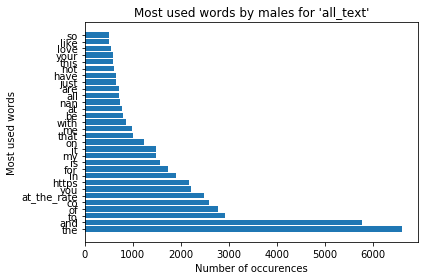

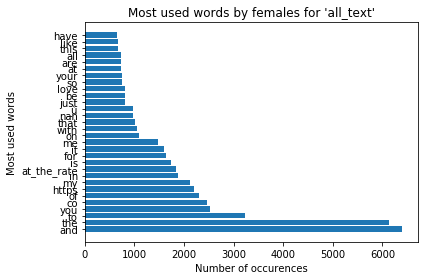

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...


In [114]:
#Data exploration for text features
#Normalizing text and finding the most used words by each gender

#Adding a new column to the dataframe to store normalised version of 'text' and 'description'
twitter['text_norm'] = [normalize_text_feature(txt) for txt in twitter['text']]
twitter['description_norm'] = [normalize_text_feature(txt) for txt in twitter['description']]

#Concatenating the nomalized 'text_norm' and 'description_norm' into a single column as text can be represented in a single column
twitter['all_text'] =twitter['text_norm'].str.cat(twitter['description_norm'],sep=' ')
twitter = twitter.drop(['text', 'description', 'text_norm', 'description_norm'], axis = 1)

#Extract separate gender dataframes
female_data = twitter[twitter['gender']=='female']
male_data = twitter[twitter['gender']=='male']

#Computing and displaying bag of words and occurences of words for each gender
male_bow, male_voc = compute_bag_of_words(male_data['all_text'])
print_most_frequent(male_bow, male_voc, 'male')

female_bow, female_voc = compute_bag_of_words(female_data['all_text'])
print_most_frequent(female_bow, female_voc, 'female')

twitter.head()

In [115]:
twitter.dropna()

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,"at_the_rate lookupondeath ..fine, and i'll dr..."
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


In [116]:
twitter.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text'],
      dtype='object')

In [117]:
twitter.apply(pd.to_numeric, downcast="integer", errors="ignore")

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,"at_the_rate lookupondeath ..fine, and i'll dr..."
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


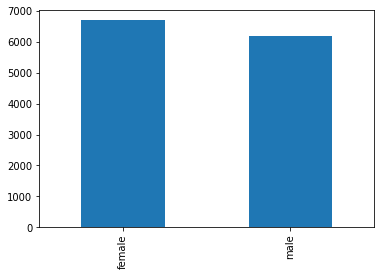

In [118]:
twitter.gender.value_counts().plot(kind='bar')

In [119]:
twitter.corr()

,_unit_id,tweet_count
_unit_id,1.000000,0.000742
tweet_count,0.000742,1.000000


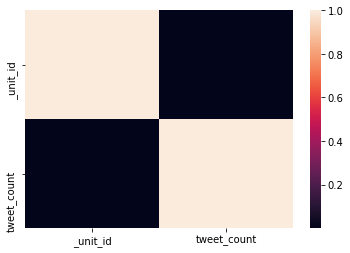

In [120]:
sns.heatmap(twitter.corr())

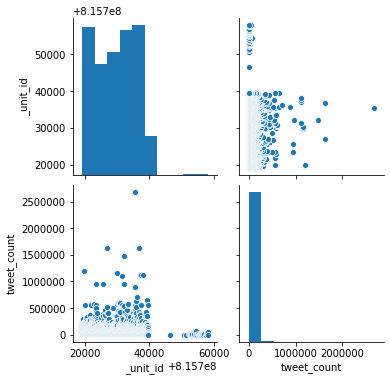

In [121]:
sns.pairplot(twitter)

In [122]:
#Type Markdown and LaTeX:  𝛼2

Q2) How significant are the colors used by the users in classifying gender

In [123]:
#This function is to visualize the most used colors by each gender in their profile

def explore_color_feature(df, feature):
    '''
    Definition of function for data exploration for the colors.
    The explore_color_feature function plots the most used colors by gender as bar graphs.
    
    Arguments:
    feature : 'sidebar_color', 'link_color'
    df: dataset to be visualized.
    
    Returns:
    None
    '''

    #Creating a subset of the gender and color of the feature being visualized
    Color_subset = df.loc[:,['gender', feature]]

    #Splitting the dataset w.r.t. 'gender' 
    Color_subset_male = Color_subset[Color_subset['gender'] == 'male']
    Color_subset_female = Color_subset[Color_subset['gender'] == 'female']

    #List of all colors and number of users for each gender
    colors_list_male = list(Color_subset_male[feature].values.flatten())
    colors_list_female = list(Color_subset_female[feature].values.flatten())

    #30 Most common colors used by each gender (30 chosen for easy clarity in representation)
    nCommon = 30
    top_colors_female = [x[0] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_male = [x[0] for x in Counter(colors_list_male).most_common(nCommon)]

    #Number of profiles using the each color in the 30 most common colors
    top_colors_users_female = [x[1] for x in Counter(colors_list_female).most_common(nCommon)]
    top_colors_users_male = [x[1] for x in Counter(colors_list_male).most_common(nCommon)]

    #Deriving the hexadecimal value to represent each color in the graph
    top_colors_female_hex = ['#' + x + '000000' for x in top_colors_female]
    top_colors_female_hex = [x[0:7] for x in top_colors_female_hex]
    top_colors_male_hex = ['#' + x + '000000' for x in top_colors_male]
    top_colors_male_hex = [x[0:7] for x in top_colors_male_hex]

    #Range of colors for each gender
    color_range_female = list(range(len(top_colors_female)))
    color_range_male = list(range(len(top_colors_male)))

    #Color usage plot for female profiles
    fig1, ax1 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_female, top_colors_users_female, bar_width, label = 'Female', color = top_colors_female_hex)
    plt.yticks(color_range_female, top_colors_female_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Females for ' + feature)
    plt.tight_layout()
    plt.show()

    #Color usage plot for male profiles
    fig2, ax2 = plt.subplots()

    bar_width = 0.5
    rects1 = plt.barh(color_range_male, top_colors_users_male, bar_width, label = 'Male', color = top_colors_male_hex)
    plt.yticks(color_range_male, top_colors_male_hex)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Males for ' + feature)
    plt.tight_layout()
    plt.show()

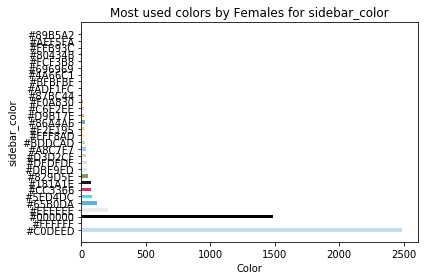

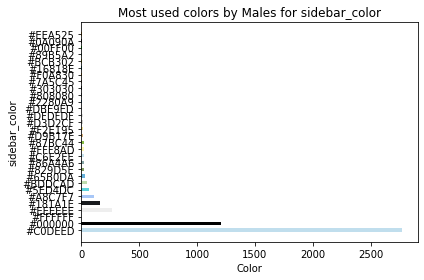

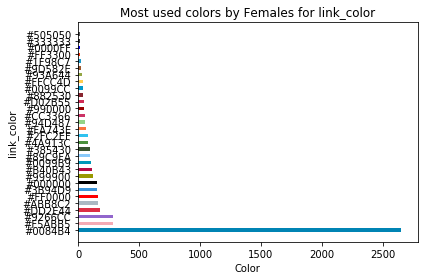

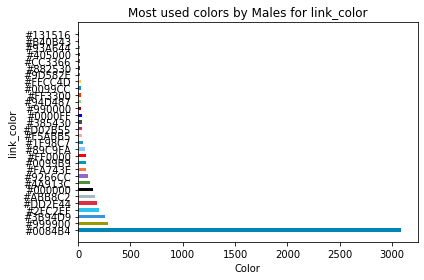

In [124]:
#Data exploration for color features

#Removing weird values from color
twitter = twitter.loc[(twitter['sidebar_color']).str.contains('E\+') != True]
twitter = twitter.loc[(twitter['link_color']).str.contains('E\+') != True]

#Plot for the most used 'sidebar_colors'
explore_color_feature(twitter, 'sidebar_color')

#Plot for the most used 'link_colors'
explore_color_feature(twitter, 'link_color')

In [125]:
twitter.dropna()

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,"at_the_rate lookupondeath ..fine, and i'll dr..."
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


In [126]:
twitter.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text'],
      dtype='object')

In [127]:
twitter.apply(pd.to_numeric, downcast="integer", errors="ignore")

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...
...,...,...,...,...,...,...
20045,815757572,female,0084B4,C0DEED,783,"at_the_rate lookupondeath ..fine, and i'll dr..."
20046,815757681,male,CFB929,0,13523,greg hardy you a good player and all but don't...
20047,815757830,male,0084B4,C0DEED,26419,you can miss people and still never want to se...
20048,815757921,female,9266CC,0,56073,at_the_rate bitemyapp i had noticed your tend...


# Label Encoding

In [128]:
le = LabelEncoder()

In [129]:
#Label Encoding  
twitter['Gender2'] = le.fit_transform(twitter['gender'].astype('str'))
twitter['Linkcolor'] = le.fit_transform(twitter['link_color'].astype('str'))
twitter['Text1'] = le.fit_transform(twitter['all_text'].astype('str'))
twitter['Sidebar1'] = le.fit_transform(twitter['sidebar_color'].astype('str'))




# Considering Logistic Regression, Support Vector Machines and Random Forest for comparing the accuracy scores

# Logistic regression 

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
LogReg = LogisticRegression()

In [132]:
#_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1 are the Independant variables
X = twitter[['_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [133]:
# Gender is the dependent Variable
Y = twitter[['Gender2']].values

In [134]:
#train_test_split is imported to split the testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [135]:
#Training the datasets
LogReg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#Prediciting the testing data scores for logistic regression
LogReg.score(X_test, Y_test)

0.5169517884914463

# kNN Classification

In [193]:
twitter.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text', 'Gender2', 'Linkcolor', 'Text1', 'Sidebar1'],
      dtype='object')

In [194]:
#_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1 are the Independant variables
C = twitter[['_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [195]:
# Gender is the dependent Variable
D = Y = twitter[['Gender2']].values

In [196]:
#train_test_split is imported to split the testing and training data
C_train, C_test, D_train, D_test = train_test_split(C,D)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(n_neighbors=12)

In [199]:
knn.fit(C_train, D_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [200]:
d_pred = knn.predict(C_test)

In [201]:
from sklearn.metrics import accuracy_score

In [202]:
#Prediciting the accuracy for kNN Classification
accuracy_score(D_test,d_pred)

0.5452566096423017

In [203]:
#create a dictionary of all values we want to test for n_neighbors
params_knn={'n_neighbors':np.arange(1,25)}

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
#use gridsearch to test all values for n_neighbors
knn_gs=GridSearchCV(knn, params_knn, cv=5)

In [206]:
#fit model to training data
knn_gs.fit(C_train,D_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=12, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [207]:
#save best model
knn_best=knn_gs.best_estimator_

In [208]:
print(knn_gs.best_params_)

{'n_neighbors': 24}


# k means algorithm

In [209]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

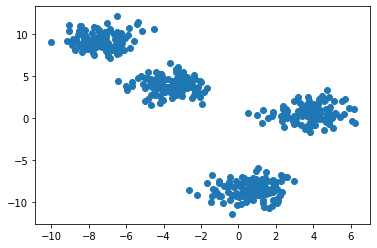

In [210]:
X, Y = make_blobs(n_samples = 500, centers = 4)
plt.scatter(X[:,0],X[:,1])

In [211]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [212]:
km = KMeans(n_clusters=5)

In [213]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [214]:
km.cluster_centers_

array([[-3.68576132,  3.99268529],
       [ 1.29974382, -8.3007834 ],
       [-7.42772581,  9.30827525],
       [ 3.83999751,  0.53143191],
       [-0.5308285 , -8.73916604]])

In [215]:
twitter.columns

Index(['_unit_id', 'gender', 'link_color', 'sidebar_color', 'tweet_count',
       'all_text', 'Gender2', 'Linkcolor', 'Text1', 'Sidebar1'],
      dtype='object')

In [216]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [217]:
kmeans.predict([[-9.4113732 , -7.27051084]])

array([0])

In [218]:
kmeans.cluster_centers_

array([[ 2.24768994, -3.96183109],
       [-5.55674356,  6.65048027]])

# Random forest

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
twitter.head()

,_unit_id,gender,link_color,sidebar_color,tweet_count,all_text,Gender2,Linkcolor,Text1,Sidebar1
0,815719226,male,08C2C2,FFFFFF,110964,robbie e responds to critics after win against...,1,166,10050,407
1,815719227,male,0084B4,C0DEED,7471,ûïit felt like they were my friends and i was...,1,51,12697,261
2,815719228,male,ABB8C2,C0DEED,5617,i absolutely adore when louis starts the songs...,1,1386,6759,261
3,815719229,male,0084B4,C0DEED,1693,hi jordanspieth looking at the url do you use ...,1,51,6539,261
4,815719230,female,3B94D9,0,31462,watching neighbours on sky+ catching up with t...,0,688,11867,0


In [221]:
#_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1 are the Independant variables
X = twitter[['_unit_id','tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [222]:
# Gender is the dependent Variable
Y = twitter[['Gender2']].values

In [223]:
#train_test_split is imported to split the testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [224]:
X_train.shape, X_test.shape, X_train.shape, Y_test.shape

((9644, 5), (3215, 5), (9644, 5), (3215, 1))

In [225]:
rfc = RandomForestClassifier(n_estimators=50)

In [226]:
rfc.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
rfc_predicted = rfc.predict(X_test)

In [228]:
from sklearn.metrics import accuracy_score

In [229]:
#Prediciting the accuracy for Random Forest Algorithm
accuracy_score(rfc_predicted, Y_test)

0.5987558320373251

In [230]:
#create dictionary of all values we want test for n_estimators
params_rf={'n_estimators': [50, 100, 200]}

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
rf_gs = GridSearchCV(rfc, params_rf, cv=5)

In [177]:
#fit model to training data
rf_gs.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random

In [178]:
rf_best=rf_gs.best_estimator_

In [179]:
#Finding out among the dictionaries which is the best estimator value for maximum accuracy
print(rf_gs.best_params_)

{'n_estimators': 200}


# SVM

In [101]:
#'_unit_id', 'tweet_count', 'Linkcolor', 'Text1', 'Sidebar1' are the Independatn Variables
A = twitter[['_unit_id', 'tweet_count', 'Linkcolor', 'Text1', 'Sidebar1']].values

In [102]:
# Gender is the dependent Variable
B = twitter[['Gender2']].values

In [103]:
#train_test_split is imported to split the testing and training data
A_train, A_test, B_train, B_test = train_test_split(A,B)

In [104]:
from sklearn.svm import SVC

In [105]:
svc = SVC()

In [106]:
svc.fit(A_train , B_train)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
svc_predicted = svc.predict(A_test)

In [108]:
#Predicting the accuracy for SVM Algorithm
accuracy_score(svc_predicted, B_test)

0.5234836702954899

In [109]:
#test the three models with the test data and print their accuracy scores
print('knn:{}'.format(knn_best.score(C_test,D_test)))
print('rfc:{}'.format(rf_best.score(X_test,Y_test)))
print('log_reg:{}'.format(LogReg.score(X_test,Y_test)))

knn:0.5486780715396579
rfc:0.5940902021772939
log_reg:0.5157076205287714


In [110]:
from sklearn.ensemble import VotingClassifier

In [111]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rfc', rf_best), ('LogReg', LogReg)]

In [112]:
#create our voting classifier,inputting our models
ensemble=VotingClassifier(estimators,voting='hard')

In [113]:
#fit model to training data
ensemble.fit(X_train,Y_train)

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=12,
                                                   p=2, weights='uniform')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=No

In [114]:
#test our model on the test data
ensemble.score(X_test,Y_test)

0.5726283048211509

# Conclusion

#                                              THE END